### Percentage of Foreign Born Population in Metro L Line Del Mar Station Walkshed

Using 2019 ACS 5 Year data, I will be creating a cholorpleth map showing percentage foreign born populations within a 10 minute walking distance of the Del Mar Station. I will overlay this data with a isochrone map of the walkshed (10 minute walking distance) around Del Mar Station.

In [2]:
import pandas as pd

import geopandas as gpd

import contextily as ctx

import matplotlib.pyplot as plt

# for network analysis
import networkx as nx

# for street network analysis
import osmnx as ox

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
address = 'Del Mar, South Raymond Avenue, Old Pasadena, Pasadena, Los Angeles County, California, 91105, United States'
network_type = 'walk'
trip_times = [10] #in minutes
meters_per_minute = 80 # travel distance per minute

In [4]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# download the street network
G = ox.graph_from_address(address, network_type=network_type, dist = 1500)

CPU times: user 3.54 s, sys: 90 ms, total: 3.63 s
Wall time: 3.65 s


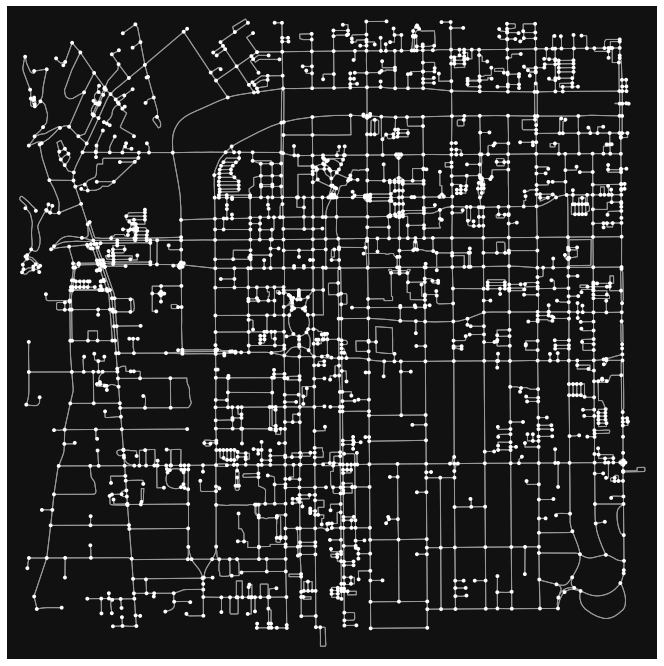

In [5]:
fig, ax = ox.plot_graph(G,figsize=(12,12))

In [6]:
G = ox.project_graph(G, to_crs='epsg:3857')

In [7]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)

In [8]:
gdf_nodes.head()

y             x          highway  street_count  \
osmid                                                                   
14963716    4.049279e+06 -1.315043e+07  traffic_signals             4   
6784510760  4.049278e+06 -1.315040e+07              NaN             3   
3892769467  4.049279e+06 -1.315045e+07  traffic_signals             4   
1995207967  4.049204e+06 -1.315043e+07              NaN             4   
6784510757  4.049306e+06 -1.315043e+07              NaN             3   

                   lon        lat                           geometry  
osmid                                                                 
14963716   -118.132316  34.152361  POINT (-13150429.308 4049278.739)  
6784510760 -118.132087  34.152358  POINT (-13150403.793 4049278.403)  
3892769467 -118.132468  34.152362  POINT (-13150446.139 4049278.941)  
1995207967 -118.132311  34.151805  POINT (-13150428.729 4049204.015)  
6784510757 -118.132316  34.152564  POINT (-13150429.308 4049306.141)

<AxesSubplot:>

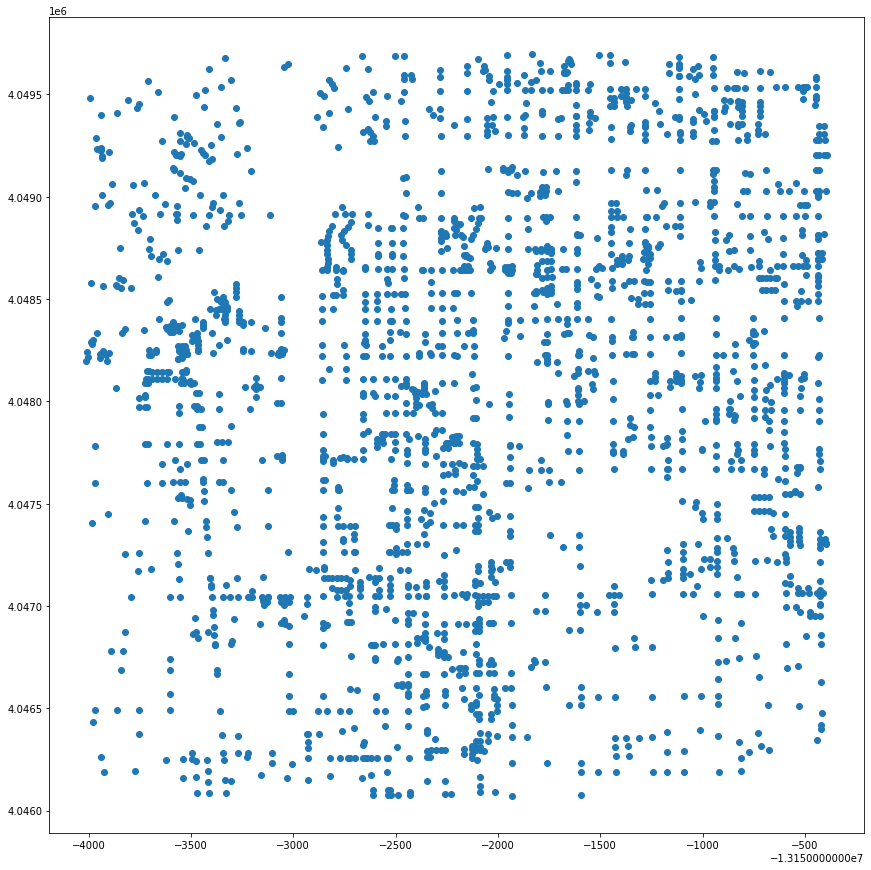

In [9]:
gdf_nodes.plot(figsize=(15,15))

In [10]:
gdf_edges.head()

osmid  oneway               name  \
u          v          key                                                      
14963716   6784510760 0                 405328940   False       Maple Street   
           3892769467 0                 607802969   False       Maple Street   
           1995207967 0    [173415946, 173415947]   False  North Lake Avenue   
           6784510757 0                 385937988   False  North Lake Avenue   
6784510760 14963716   0                 405328940   False       Maple Street   

                             highway  length  \
u          v          key                      
14963716   6784510760 0      primary  21.093   
           3892769467 0      primary  13.914   
           1995207967 0    secondary  61.772   
           6784510757 0    secondary  22.659   
6784510760 14963716   0      primary  21.093   

                                                                    geometry  \
u          v          key                                                      
14963716   6784510760 0    LINESTRING (-13150429.308 4049278.739, -131504...   
           3892769467 0    LINESTRING (-13150429.308 4049278.739, -131504...   
           1995207967 0    LINESTRING (-13150429.308 4049278.739, -131504...   
           6784510757 0    LINESTRING (-13150429.308 4049278.739, -131504...   
6784510760 14963716   0    LINESTRING (-13150403.793 4049278.403, -131504...   

                          maxspeed bridge lanes access service  ref tunnel  \
u          v          key                                                    
14963716   6784510760 0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   
           3892769467 0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   
           1995207967 0     35 mph    yes   NaN    NaN     NaN  NaN    NaN   
           6784510757 0     35 mph    NaN   NaN    NaN     NaN  NaN    NaN   
6784510760 14963716   0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   

                          width  
u          v          key        
14963716   6784510760 0     NaN  
           3892769467 0     NaN  
           1995207967 0     NaN  
           6784510757 0     NaN  
6784510760 14963716   0     NaN

<AxesSubplot:>

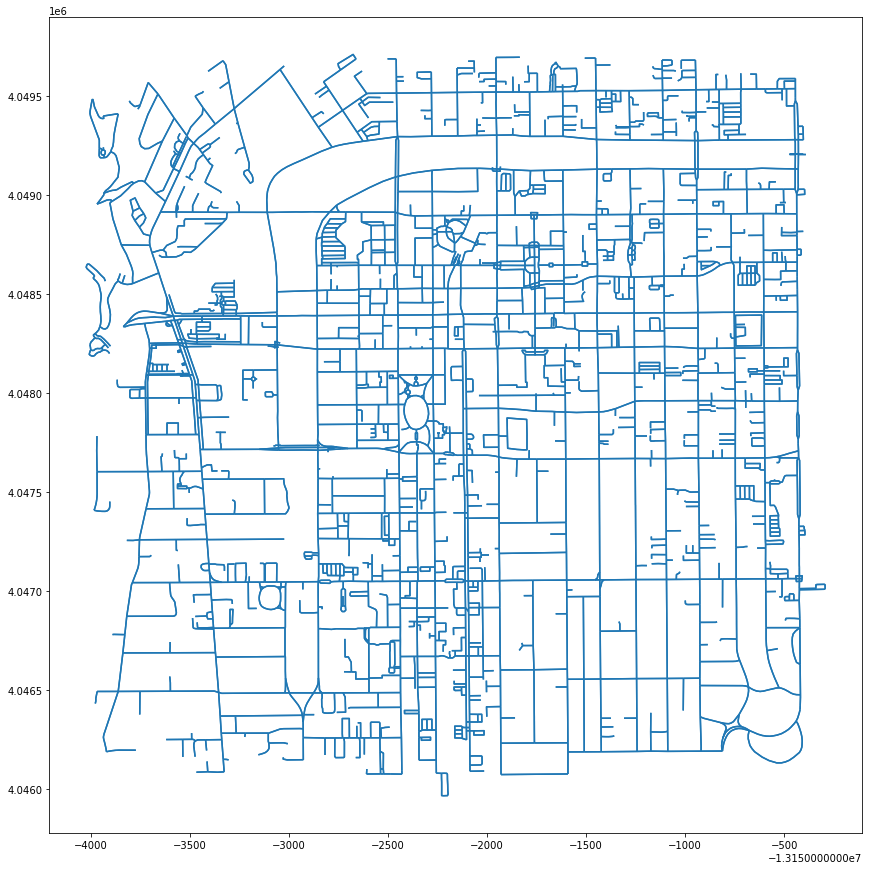

In [11]:
gdf_edges.plot(figsize=(15,15))

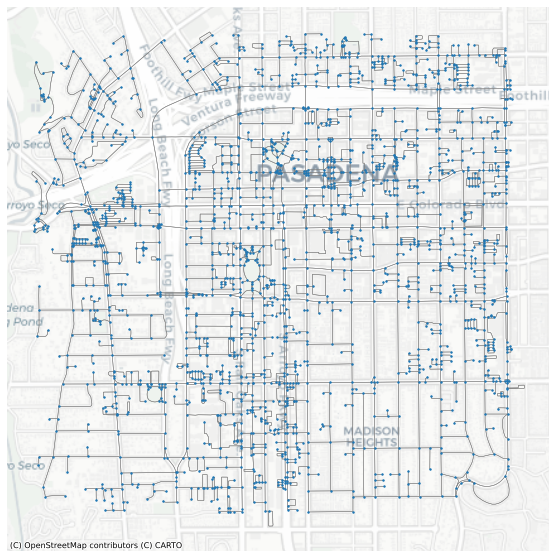

In [12]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)


# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [13]:
# get the bounding box coordinates
minx, miny, maxx, maxy = gdf_nodes.geometry.total_bounds
print(minx)
print(miny)
print(maxx)
print(maxy)

-13154010.901174664
4046072.998110596
-13150391.069632793
4049695.185661036


In [14]:
# calculate the centroid
centroid_x = (maxx-minx)/2 + minx
centroid_y = (maxy-miny)/2 + miny
print(centroid_x)
print(centroid_y)

-13152200.985403728
4047884.0918858163


In [15]:
# use osmnx's distance.nearest_nodes command to get the id for the nearest node
center_node = ox.distance.nearest_nodes(G,Y=centroid_y,X=centroid_x)
print('The id for the nearest node is ' + str(center_node))

The id for the nearest node is 1995241213


In [16]:
# what is this record?
gdf_nodes.loc[[center_node]]

y             x highway  street_count         lon  \
osmid                                                                      
1995241213  4.047831e+06 -1.315221e+07     NaN             1 -118.148271   

                  lat                           geometry  
osmid                                                     
1995241213  34.141596  POINT (-13152205.321 4047830.780)

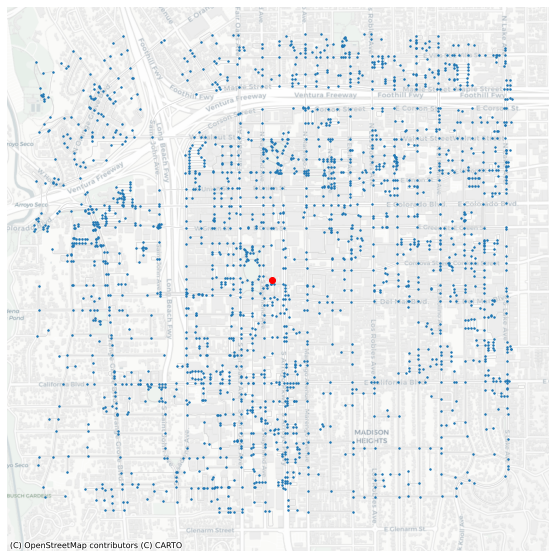

In [17]:
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(10,10))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gainsboro', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax, 
               markersize=2, 
               zorder=20)

# add the center node in red also to ax
gdf_nodes.loc[[center_node]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [18]:
gdf_edges.sample(5)

osmid  oneway          name      highway  \
u          v          key                                                 
7662951996 7662951992 0    820844604   False           NaN      footway   
6443498146 26850922   0    166979337   False  Grand Avenue  residential   
4989832427 4989832428 0    509832959   False  Morgan Alley      service   
6787754355 7374082861 0    723727247   False           NaN      service   
5549289845 5549289847 0    579431503   False           NaN      service   

                            length  \
u          v          key            
7662951996 7662951992 0     27.884   
6443498146 26850922   0    113.168   
4989832427 4989832428 0    130.433   
6787754355 7374082861 0     34.809   
5549289845 5549289847 0     17.745   

                                                                    geometry  \
u          v          key                                                      
7662951996 7662951992 0    LINESTRING (-13153935.237 4049200.773, -131539...   
6443498146 26850922   0    LINESTRING (-13153758.484 4047173.496, -131537...   
4989832427 4989832428 0    LINESTRING (-13151961.576 4048345.174, -131521...   
6787754355 7374082861 0    LINESTRING (-13150727.221 4049356.316, -131507...   
5549289845 5549289847 0    LINESTRING (-13152765.381 4047137.331, -131527...   

                          maxspeed bridge lanes access service  ref tunnel  \
u          v          key                                                    
7662951996 7662951992 0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   
6443498146 26850922   0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   
4989832427 4989832428 0        NaN    NaN   NaN    NaN   alley  NaN    NaN   
6787754355 7374082861 0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   
5549289845 5549289847 0        NaN    NaN   NaN    NaN     NaN  NaN    NaN   

                          width  
u          v          key        
7662951996 7662951992 0     NaN  
6443498146 26850922   0     NaN  
4989832427 4989832428 0     NaN  
6787754355 7374082861 0     NaN  
5549289845 5549289847 0     NaN

In [19]:
gdf_edges['walk_time'] = (gdf_edges['length']/meters_per_minute)

In [20]:
gdf_edges.sample(5)

osmid  oneway          name  highway  length  \
u          v          key                                                     
2441077082 2441077087 0    236031672   False           NaN  service  19.828   
7458959732 7458959735 0    797530156   False           NaN  service  16.704   
8410643641 8410643644 0    905673014   False           NaN  service  45.730   
1919958772 1919958794 0    181582592   False  Drexel Place  service   8.734   
6822446856 6822446859 0    728042137   False           NaN  service  65.511   

                                                                    geometry  \
u          v          key                                                      
2441077082 2441077087 0    LINESTRING (-13150601.608 4048126.617, -131505...   
7458959732 7458959735 0    LINESTRING (-13150688.627 4048603.980, -131506...   
8410643641 8410643644 0    LINESTRING (-13150532.924 4046708.727, -131505...   
1919958772 1919958794 0    LINESTRING (-13152716.411 4046923.868, -131527...   
6822446856 6822446859 0    LINESTRING (-13150945.507 4049416.526, -131509...   

                          maxspeed bridge lanes access        service  ref  \
u          v          key                                                    
2441077082 2441077087 0        NaN    NaN   NaN    NaN  parking_aisle  NaN   
7458959732 7458959735 0        NaN    NaN   NaN    NaN            NaN  NaN   
8410643641 8410643644 0        NaN    NaN   NaN    NaN       driveway  NaN   
1919958772 1919958794 0        NaN    NaN   NaN    NaN       driveway  NaN   
6822446856 6822446859 0        NaN    NaN   NaN    NaN            NaN  NaN   

                          tunnel width  walk_time  
u          v          key                          
2441077082 2441077087 0      NaN   NaN   0.247850  
7458959732 7458959735 0      NaN   NaN   0.208800  
8410643641 8410643644 0      NaN   NaN   0.571625  
1919958772 1919958794 0      NaN   NaN   0.109175  
6822446856 6822446859 0      NaN   NaN   0.818887

In [21]:
# assign a color hex code for each trip time isochrone
iso_colors = ox.plot.get_colors(n=len(trip_times), 
                                cmap='plasma', 
                                start=0, 
                                return_hex=True)
print(trip_times)
print(iso_colors)

[10]
['#0d0887']


In [22]:
time_color = list(zip(trip_times, iso_colors))
time_color

[(10, '#0d0887')]

In [23]:
for time, color in list(time_color):

    # for each trip time, create an egograph of nodes that fall within that distance
    subgraph = nx.ego_graph(G, 1995241213, radius=time)

    print('There are ' + str(len(subgraph.nodes())) + ' nodes within ' + str(time) + ' minutes ')
    
    # for each of those nodes, update the gdf_nodes dataframe and assign it with its associated distance color
    for node in subgraph.nodes():
        gdf_nodes.loc[node,'time'] = str(time) + ' mins'
        gdf_nodes.loc[node,'color'] = color

There are 179 nodes within 10 minutes 


In [24]:
gdf_nodes.sample(30)

y             x          highway  street_count  \
osmid                                                                   
7436844490  4.047303e+06 -1.315235e+07              NaN             3   
601848086   4.047908e+06 -1.315175e+07              NaN             3   
6352850329  4.046076e+06 -1.315254e+07              NaN             3   
7958591989  4.048198e+06 -1.315401e+07              NaN             3   
5544331394  4.047438e+06 -1.315194e+07              NaN             3   
122646335   4.046815e+06 -1.315059e+07              NaN             3   
6822949752  4.047961e+06 -1.315087e+07              NaN             3   
8178519513  4.047724e+06 -1.315274e+07              NaN             3   
7958592016  4.048236e+06 -1.315390e+07              NaN             1   
442807435   4.048650e+06 -1.315149e+07              NaN             3   
7958581370  4.048199e+06 -1.315391e+07              NaN             1   
6817431483  4.048474e+06 -1.315132e+07              NaN             3   
8366502786  4.047791e+06 -1.315210e+07              NaN             3   
8459989145  4.047127e+06 -1.315125e+07              NaN             3   
1687115220  4.049131e+06 -1.315043e+07  traffic_signals             4   
8265630554  4.047775e+06 -1.315259e+07              NaN             1   
6433854427  4.047600e+06 -1.315194e+07              NaN             3   
3053019348  4.048624e+06 -1.315181e+07              NaN             3   
3823850483  4.046669e+06 -1.315302e+07              NaN             3   
6078112224  4.048108e+06 -1.315255e+07              NaN             3   
1447280691  4.048313e+06 -1.315347e+07              NaN             3   
6734880841  4.049449e+06 -1.315162e+07              NaN             3   
5549289854  4.047095e+06 -1.315268e+07              NaN             3   
6069893120  4.046279e+06 -1.315213e+07              NaN             3   
123605466   4.047392e+06 -1.315276e+07              NaN             3   
9277622554  4.048689e+06 -1.315044e+07              NaN             3   
2028699256  4.047989e+06 -1.315232e+07              NaN             3   
6839687112  4.046282e+06 -1.315327e+07              NaN             3   
122685317   4.046258e+06 -1.315282e+07              NaN             3   
1446791880  4.048109e+06 -1.315367e+07              NaN             3   

                   lon        lat                           geometry     time  \
osmid                                                                           
7436844490 -118.149597  34.137674  POINT (-13152352.998 4047303.296)  10 mins   
601848086  -118.144212  34.142168  POINT (-13151753.576 4047907.714)  10 mins   
6352850329 -118.151266  34.128550  POINT (-13152538.757 4046076.279)      NaN   
7958591989 -118.164490  34.144323  POINT (-13154010.901 4048197.567)      NaN   
5544331394 -118.145894  34.138672  POINT (-13151940.759 4047437.548)  10 mins   
122646335  -118.133777  34.134041  POINT (-13150591.946 4046814.730)      NaN   
6822949752 -118.136245  34.142565  POINT (-13150866.604 4047961.071)      NaN   
8178519513 -118.153051  34.140803  POINT (-13152737.506 4047724.121)      NaN   
7958592016 -118.163517  34.144611  POINT (-13153902.587 4048236.372)      NaN   
442807435  -118.141877  34.147683  POINT (-13151493.578 4048649.525)      NaN   
7958581370 -118.163567  34.144333  POINT (-13153908.098 4048198.939)      NaN   
6817431483 -118.140278  34.146376  POINT (-13151315.600 4048473.749)      NaN   
8366502786 -118.147362  34.141304  POINT (-13152104.154 4047791.479)  10 mins   
8459989145 -118.139685  34.136365  POINT (-13151249.532 4047127.231)      NaN   
1687115220 -118.132319  34.151260  POINT (-13150429.575 4049130.717)      NaN   
8265630554 -118.151725  34.141182  POINT (-13152589.908 4047775.043)      NaN   
6433854427 -118.145892  34.139879  POINT (-13151940.514 4047599.899)  10 mins   
3053019348 -118.144689  34.147494  POINT (-13151806.564 4048624.130)      NaN   
3823850483 -118.155585  34.132958  POINT (-13153019.523 4046669.02

In [25]:
gdf_nodes['color'].fillna('#cccccc', inplace=True)

In [26]:
gdf_nodes.sample(5)

y             x          highway  street_count  \
osmid                                                                   
123430810   4.048528e+06 -1.315213e+07  traffic_signals             4   
6822494098  4.048028e+06 -1.315260e+07              NaN             3   
647079454   4.048804e+06 -1.315217e+07              NaN             3   
601846778   4.046372e+06 -1.315293e+07              NaN             3   
6726368358  4.049382e+06 -1.315169e+07              NaN             1   

                   lon        lat                           geometry time  \
osmid                                                                       
123430810  -118.147627  34.146781  POINT (-13152133.654 4048528.157)  NaN   
6822494098 -118.151820  34.143060  POINT (-13152600.394 4048027.716)  NaN   
647079454  -118.147958  34.148831  POINT (-13152170.512 4048803.917)  NaN   
601846778  -118.154815  34.130751  POINT (-13152933.807 4046372.286)  NaN   
6726368358 -118.143659  34.153131  POINT (-13151692.016 4049382.305)  NaN   

              color  
osmid                
123430810   #cccccc  
6822494098  #cccccc  
647079454   #cccccc  
601846778   #cccccc  
6726368358  #cccccc

<AxesSubplot:>

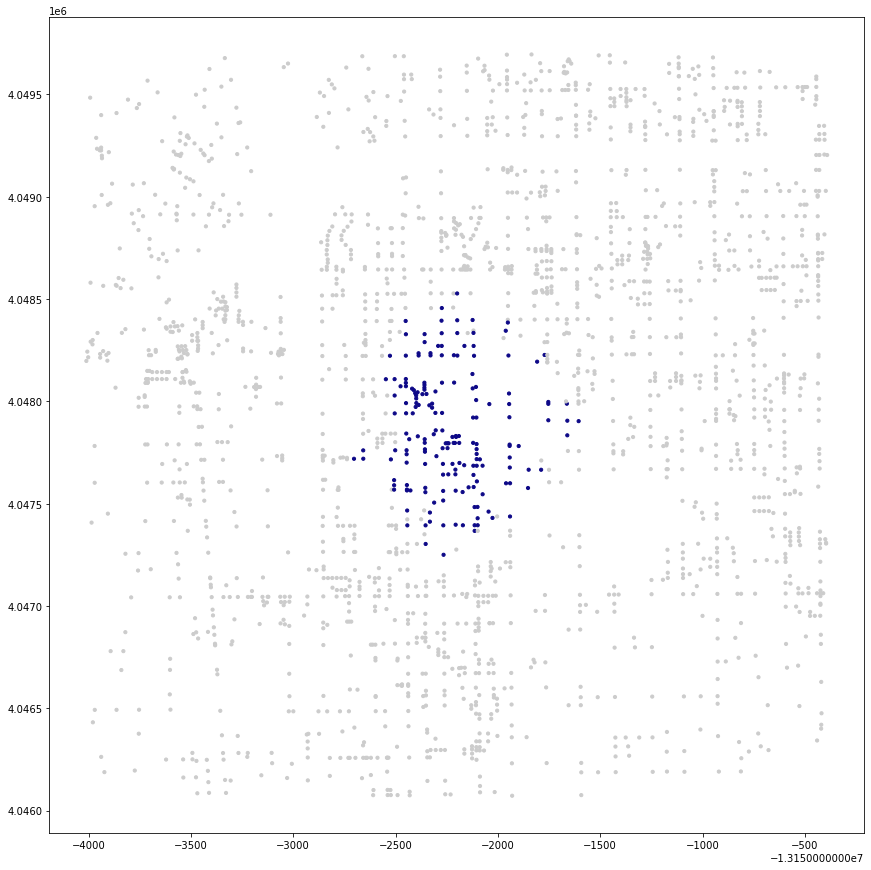

In [27]:
#plotting and taking a look at my nodes within the walkshed
gdf_nodes.plot(figsize=(15,15),
               color=gdf_nodes['color'],
               markersize=10)

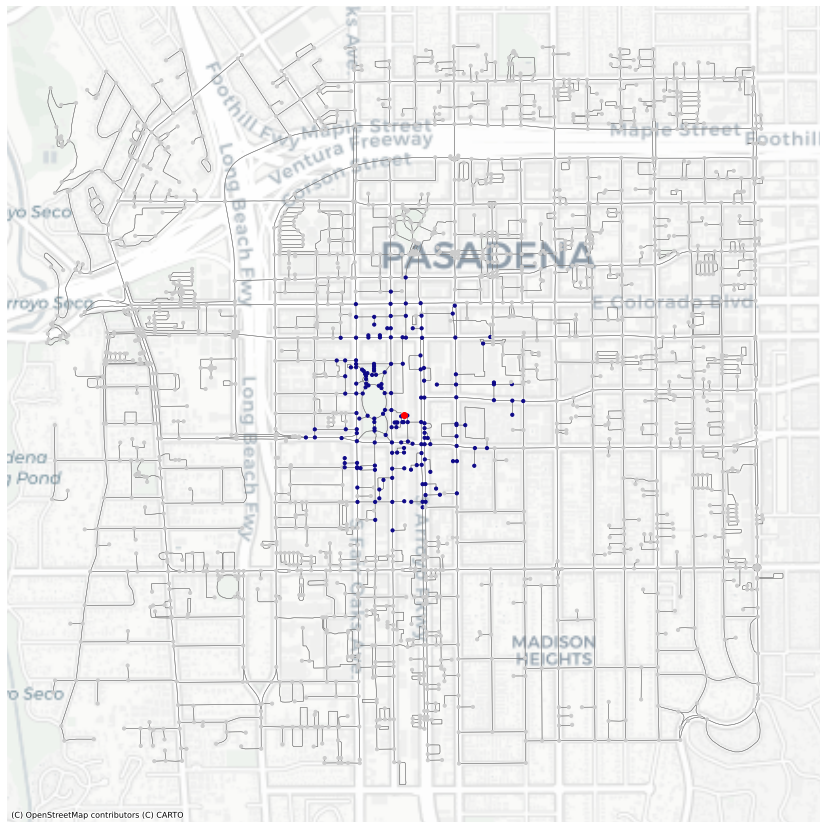

In [29]:
# a "full" map
# set up the subplot (single plot = ax)
fig, ax = plt.subplots(figsize=(15,15))

# add the edges to ax
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               edgecolor='gray', 
               zorder=10)

# add all nodes to ax
gdf_nodes.plot(ax=ax,
               color=gdf_nodes['color'],
               markersize=10, 
               zorder=20)

# marking the station site with a red dot. Grabbed the station's node from OpenStreet Maps
gdf_nodes.loc[[1995241213]].plot(ax=ax,
                                  color='r', 
                                  zorder=30)

# no axis
ax.axis('off')

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron,zoom=14)

In [30]:
gdf_nodes[gdf_nodes['time']=='10 mins']

y             x          highway  street_count  \
osmid                                                                   
16218739    4.048393e+06 -1.315245e+07  traffic_signals             4   
122575436   4.048394e+06 -1.315228e+07  traffic_signals             4   
122615775   4.048328e+06 -1.315245e+07              NaN             3   
29322322    4.047716e+06 -1.315252e+07              NaN             3   
725857496   4.047742e+06 -1.315245e+07              NaN             3   
...                  ...           ...              ...           ...   
8366502777  4.047717e+06 -1.315209e+07              NaN             3   
8366502785  4.047743e+06 -1.315210e+07              NaN             3   
8366502796  4.047767e+06 -1.315210e+07              NaN             3   
8692209116  4.047590e+06 -1.315251e+07              NaN             3   
8692235617  4.047615e+06 -1.315251e+07              NaN             1   

                   lon        lat                           geometry     time  \
osmid                                                                           
16218739   -118.150475  34.145775  POINT (-13152450.736 4048392.897)  10 mins   
122575436  -118.148901  34.145787  POINT (-13152275.453 4048394.443)  10 mins   
122615775  -118.150464  34.145293  POINT (-13152449.467 4048328.011)  10 mins   
29322322   -118.151123  34.140746  POINT (-13152522.860 4047716.495)  10 mins   
725857496  -118.150433  34.140933  POINT (-13152446.005 4047741.674)  10 mins   
...                ...        ...                                ...      ...   
8366502777 -118.147218  34.140748  POINT (-13152088.124 4047716.737)  10 mins   
8366502785 -118.147359  34.140944  POINT (-13152103.865 4047743.113)  10 mins   
8366502796 -118.147361  34.141119  POINT (-13152104.009 4047766.677)  10 mins   
8692209116 -118.150981  34.139806  POINT (-13152507.008 4047590.094)  10 mins   
8692235617 -118.150981  34.139993  POINT (-13152507.086 4047615.205)  10 mins   

              color  
osmid                
16218739    #0d0887  
122575436   #0d0887  
122615775   #0d0887  
29322322    #0d0887  
725857496   #0d0887  
...             ...  
8366502777  #0d0887  
8366502785  #0d0887  
8366502796  #0d0887  
8692209116  #0d0887  
8692235617  #0d0887  

[179 rows x 9 columns]

In [31]:
#creating a new variable for 10 mins nodes
gdf_10 = gdf_nodes[gdf_nodes['time']=='10 mins']

<AxesSubplot:>

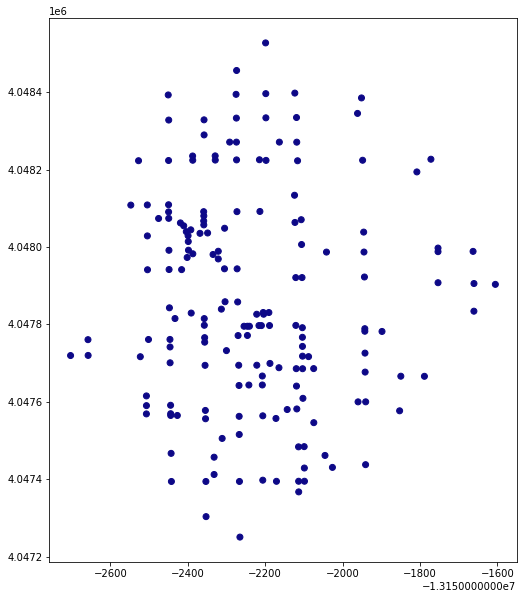

In [32]:
gdf_10.plot(figsize=(10,10),color=gdf_10.color)

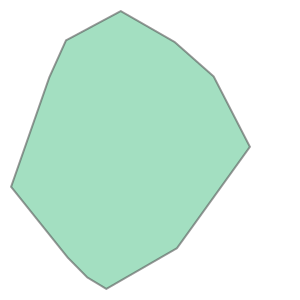

In [33]:
#creating our convex hull
gdf_10.unary_union.convex_hull

In [34]:
isochrones = gdf_nodes.dissolve("time")
isochrones

geometry             y  \
time                                                                       
10 mins  MULTIPOINT (-13152703.098 4047719.535, -131526...  4.048393e+06   

                    x          highway  street_count         lon        lat  \
time                                                                          
10 mins -1.315245e+07  traffic_signals             4 -118.150475  34.145775   

           color  
time              
10 mins  #0d0887

In [35]:
isochrones = isochrones.convex_hull.reset_index()
isochrones

time                                                  0
0  10 mins  POLYGON ((-13152265.489 4047250.399, -13152352...

In [36]:
isochrones.columns=['time','geometry']
isochrones

time                                           geometry
0  10 mins  POLYGON ((-13152265.489 4047250.399, -13152352...

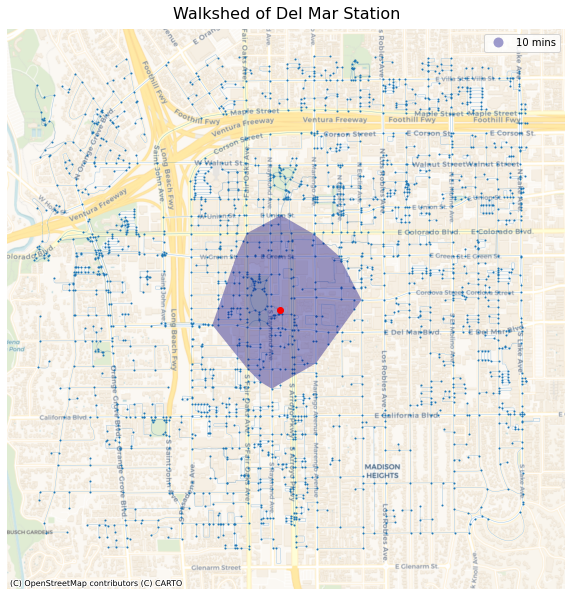

In [39]:
#plotting the convex hull on to the basemap

# set up the subplots
fig, ax = plt.subplots(figsize=(10,20))

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

# hide the axis
ax.axis('off')

# give it a title
ax.set_title('Walkshed of Del Mar Station',fontsize=16,pad=10)

# add the basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)

And there we have it! The convex hull of the 10 minute walkshed from Del Mar Station. Time to move on to the ACS data.

In [40]:
#Our 2019 Foreign Born Pop of LA County Table divided by Census tract

gdf = gpd.read_file('acs2019_5yr_B05015_14000US06037222001.geojson')

In [41]:
#Our 2019 Total Population for LA County Table divided by Census tract

gdft = gpd.read_file('acs2019_5yr_B01003_14000US06037222001.geojson')

In [43]:
#Because the census tracts in our data match up 1 to 1, we can merge with one line of code

df = pd.merge(gdf, gdft)

In [45]:
#Needs a bit of cleaning up, primarily deleting the margin of error colummns and renaming all the columns according to .json metadata

df

geoid                                   name  B05015001  \
0           05000US06037                 Los Angeles County, CA  3430507.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA     1424.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA      810.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA     3167.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA     1749.0   
...                  ...                                    ...        ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA      146.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA        0.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA        0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA        0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA        0.0   

      B05015001, Error  B05015002  B05015002, Error  B05015003  \
0              14119.0   288054.0            4584.0    76162.0   
1                326.0       13.0              25.0        0.0   
2                180.0        0.0              12.0        0.0   
3                438.0        0.0              17.0        0.0   
4                251.0        0.0              12.0        0.0   
...                ...        ...               ...        ...   
2342              71.0        0.0              12.0        0.0   
2343              12.0        0.0              12.0        0.0   
2344              12.0        0.0              12.0        0.0   
2345              12.0        0.0              12.0        0.0   
2346              12.0        0.0              12.0        0.0   

      B05015003, Error  B05015004  B05015004, Error  ...  B05015028, Error  \
0               2634.0   211892.0            3307.0  ...            2277.0   
1                 12.0       13.0              25.0  ...              12.0   
2                 12.0        0.0              12.0  ...              12.0   
3                 17.0        0.0              17.0  ...              17.0   
4                 12.0        0.0              12.0  ...              12.0   
...                ...        ...               ...  ...               ...   
2342              12.0        0.0              12.0  ...              12.0   
2343              12.0        0.0              12.0  ...              12.0   
2344              12.0        0.0              12.0  ...              12.0   
2345              12.0        0.0              12.0  ...              12.0   
2346              12.0        0.0              12.0  ...              12.0   

      B05015029  B05015029, Error  B05015030  B05015030, Error  B05015031  \
0      989775.0            8062.0   173834.0            3797.0   815941.0   
1         910.0             256.0      130.0              79.0      780.0   
2         690.0             149.0       36.0              36.0      654.0   
3        2054.0             299.0      198.0             182.0     1856.0   
4        1120.0             252.0      147.0             118.0      973.0   
...         ...               ...        ...               ...        ...   
2342       37.0              23.0        0.0              12.0       37.0   
2343        0.0              12.0        0.0              12.0        0.0   
2344        0.0              12.0        0.0              12.0        0.0   
2345        0.0              12.0        0.0              12.0        0.0   
2346        0.0              12.0        0.0              12.0        0.0   

      B05015031, Error                                           geometry  \
0               6993.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...   
1                249.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2                140.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3                279.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4                226.0  MULTIPOLYGON (((-1

<AxesSubplot:>

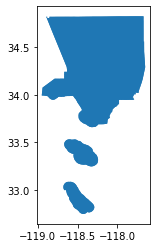

In [46]:
#Double checking our spatial data

df.plot()

In [47]:
#Quick peek at our data types, making sure our numbers a float types

df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 67 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   geoid             2347 non-null   object  
 1   name              2347 non-null   object  
 2   B05015001         2347 non-null   float64 
 3   B05015001, Error  2347 non-null   float64 
 4   B05015002         2347 non-null   float64 
 5   B05015002, Error  2347 non-null   float64 
 6   B05015003         2347 non-null   float64 
 7   B05015003, Error  2347 non-null   float64 
 8   B05015004         2347 non-null   float64 
 9   B05015004, Error  2347 non-null   float64 
 10  B05015005         2347 non-null   float64 
 11  B05015005, Error  2347 non-null   float64 
 12  B05015006         2347 non-null   float64 
 13  B05015006, Error  2347 non-null   float64 
 14  B05015007         2347 non-null   float64 
 15  B05015007, Error  2347 non-null   float64 
 16  B05015008       

In [50]:
list(df)

['geoid',
 'name',
 'B05015001',
 'B05015001, Error',
 'B05015002',
 'B05015002, Error',
 'B05015003',
 'B05015003, Error',
 'B05015004',
 'B05015004, Error',
 'B05015005',
 'B05015005, Error',
 'B05015006',
 'B05015006, Error',
 'B05015007',
 'B05015007, Error',
 'B05015008',
 'B05015008, Error',
 'B05015009',
 'B05015009, Error',
 'B05015010',
 'B05015010, Error',
 'B05015011',
 'B05015011, Error',
 'B05015012',
 'B05015012, Error',
 'B05015013',
 'B05015013, Error',
 'B05015014',
 'B05015014, Error',
 'B05015015',
 'B05015015, Error',
 'B05015016',
 'B05015016, Error',
 'B05015017',
 'B05015017, Error',
 'B05015018',
 'B05015018, Error',
 'B05015019',
 'B05015019, Error',
 'B05015020',
 'B05015020, Error',
 'B05015021',
 'B05015021, Error',
 'B05015022',
 'B05015022, Error',
 'B05015023',
 'B05015023, Error',
 'B05015024',
 'B05015024, Error',
 'B05015025',
 'B05015025, Error',
 'B05015026',
 'B05015026, Error',
 'B05015027',
 'B05015027, Error',
 'B05015028',
 'B05015028, Error',
 

In [54]:
# deleting margin of error columns

columns_to_keep =['geoid',
 'name', 
 'B01003001',
 'B05015001',                
 'B05015002',
 'B05015003',
 'B05015004',
 'B05015005',
 'B05015006',
 'B05015007',
 'B05015008',
 'B05015009',
 'B05015010',
 'B05015011',
 'B05015012',
 'B05015013',
 'B05015014',
 'B05015015',
 'B05015016',
 'B05015017',
 'B05015018',
 'B05015019',
 'B05015020',
 'B05015021',
 'B05015022',
 'B05015023',
 'B05015024',
 'B05015025',
 'B05015026',
 'B05015027',
 'B05015028',
 'B05015029',
 'B05015030',
 'B05015031',
 'geometry']

In [55]:
df = df[columns_to_keep]

In [59]:
df

geoid                                   name   B01003001  \
0           05000US06037                 Los Angeles County, CA  10081570.0   
1     14000US06037101110  Census Tract 1011.10, Los Angeles, CA      4283.0   
2     14000US06037101122  Census Tract 1011.22, Los Angeles, CA      3405.0   
3     14000US06037101210  Census Tract 1012.10, Los Angeles, CA      6347.0   
4     14000US06037101220  Census Tract 1012.20, Los Angeles, CA      3702.0   
...                  ...                                    ...         ...   
2342  14000US06037980031  Census Tract 9800.31, Los Angeles, CA      1175.0   
2343  14000US06037980033  Census Tract 9800.33, Los Angeles, CA        16.0   
2344  14000US06037990100     Census Tract 9901, Los Angeles, CA         0.0   
2345  14000US06037990200     Census Tract 9902, Los Angeles, CA         0.0   
2346  14000US06037990300     Census Tract 9903, Los Angeles, CA         0.0   

      B05015001  B05015002  B05015003  B05015004  B05015005  B05015006  \
0     3430507.0   288054.0    76162.0   211892.0    17332.0     1356.0   
1        1424.0       13.0        0.0       13.0        8.0        0.0   
2         810.0        0.0        0.0        0.0        0.0        0.0   
3        3167.0        0.0        0.0        0.0        0.0        0.0   
4        1749.0        0.0        0.0        0.0       29.0        0.0   
...         ...        ...        ...        ...        ...        ...   
2342      146.0        0.0        0.0        0.0       10.0        0.0   
2343        0.0        0.0        0.0        0.0        0.0        0.0   
2344        0.0        0.0        0.0        0.0        0.0        0.0   
2345        0.0        0.0        0.0        0.0        0.0        0.0   
2346        0.0        0.0        0.0        0.0        0.0        0.0   

      B05015007  ...  B05015023  B05015024  B05015025  B05015026  B05015027  \
0       15976.0  ...   239804.0    31931.0   207873.0    98409.0    10841.0   
1           8.0  ...      172.0       61.0      111.0        0.0        0.0   
2           0.0  ...       78.0        0.0       78.0        0.0        0.0   
3           0.0  ...       76.0        0.0       76.0        0.0        0.0   
4          29.0  ...       79.0       12.0       67.0        0.0        0.0   
...         ...  ...        ...        ...        ...        ...        ...   
2342       10.0  ...       11.0        0.0       11.0        0.0        0.0   
2343        0.0  ...        0.0        0.0        0.0        0.0        0.0   
2344        0.0  ...        0.0        0.0        0.0        0.0        0.0   
2345        0.0  ...        0.0        0.0        0.0        0.0        0.0   
2346        0.0  ...        0.0        0.0        0.0        0.0        0.0   

      B05015028  B05015029  B05015030  B05015031  \
0       87568.0   989775.0   173834.0   815941.0   
1           0.0      910.0      130.0      780.0   
2           0.0      690.0       36.0      654.0   
3           0.0     2054.0      198.0     1856.0   
4           0.0     1120.0      147.0      973.0   
...         ...        ...        ...        ...   
2342        0.0       37.0        0.0       37.0   
2343        0.0        0.0        0.0        0.0   
2344        0.0        0.0        0.0        0.0   
2345        0.0        0.0        0.0        0.0   
2346        0.0        0.0        0.0        0.0   

                                               geometry  
0     MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1     MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2     MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3     MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4     MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  
...                                                 ...  
2342  MULTIPOLYGON (((-118.29105 33.75378, -118.2905...  
2343  MULTIPOLYGON (((-118.24897 33.75590, -118.2470...  
2344  MULTIPOLYGON (((-118.95114 33.99643, -118.9505...  
2345  MULTIPOLYGON (((-118.

In [60]:
# renaming columns

df.columns = ['geoid',
 'name',
'Total Population', 
'Total Foreign Born Population',
'China, Hong Kong, and Taiwan',
'Entered 2010 or later',
'Entered before 2010',
'Cuba',
'Entered 2010 or later',
'Entered before 2010',
'Dominican Republic',
'Entered 2010 or later',
'Entered before 2010',
'El Salvador',
'Entered 2010 or later',
'Entered before 2010',
'Guatemala',
'Entered 2010 or later',
'Entered before 2010',
'India',
'Entered 2010 or later',
'Entered before 2010',
'Mexico',
'Entered 2010 or later',
'Entered before 2010',
'Philippines',
'Entered 2010 or later',
'Entered before 2010',
'Vietnam',
'Entered 2010 or later',
'Entered before 2010',
'All Other Countries',
'Entered 2010 or later',
'Entered before 2010',
'geometry']

In [61]:
df.head()

geoid                                   name  \
0        05000US06037                 Los Angeles County, CA   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   

   Total Population  Total Foreign Born Population  \
0        10081570.0                      3430507.0   
1            4283.0                         1424.0   
2            3405.0                          810.0   
3            6347.0                         3167.0   
4            3702.0                         1749.0   

   China, Hong Kong, and Taiwan  Entered 2010 or later  Entered before 2010  \
0                      288054.0                76162.0             211892.0   
1                          13.0                    0.0                 13.0   
2                           0.0                    0.0                  0.0   
3                           0.0                    0.0                  0.0   
4                           0.0                    0.0                  0.0   

      Cuba  Entered 2010 or later  Entered before 2010  ...  Philippines  \
0  17332.0                 1356.0              15976.0  ...     239804.0   
1      8.0                    0.0                  8.0  ...        172.0   
2      0.0                    0.0                  0.0  ...         78.0   
3      0.0                    0.0                  0.0  ...         76.0   
4     29.0                    0.0                 29.0  ...         79.0   

   Entered 2010 or later  Entered before 2010  Vietnam  Entered 2010 or later  \
0                31931.0             207873.0  98409.0                10841.0   
1                   61.0                111.0      0.0                    0.0   
2                    0.0                 78.0      0.0                    0.0   
3                    0.0                 76.0      0.0                    0.0   
4                   12.0                 67.0      0.0                    0.0   

   Entered before 2010  All Other Countries  Entered 2010 or later  \
0              87568.0             989775.0               173834.0   
1                  0.0                910.0                  130.0   
2                  0.0                690.0                   36.0   
3                  0.0               2054.0                  198.0   
4                  0.0               1120.0                  147.0   

   Entered before 2010                                           geometry  
0             815941.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...  
1                780.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...  
2                654.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...  
3               1856.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...  
4                973.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...  

[5 rows x 35 columns]

In [62]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 35 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geoid                          2347 non-null   object  
 1   name                           2347 non-null   object  
 2   Total Population               2347 non-null   float64 
 3   Total Foreign Born Population  2347 non-null   float64 
 4   China, Hong Kong, and Taiwan   2347 non-null   float64 
 5   Entered 2010 or later          2347 non-null   float64 
 6   Entered before 2010            2347 non-null   float64 
 7   Cuba                           2347 non-null   float64 
 8   Entered 2010 or later          2347 non-null   float64 
 9   Entered before 2010            2347 non-null   float64 
 10  Dominican Republic             2347 non-null   float64 
 11  Entered 2010 or later          2347 non-null   float64 
 12  Entered before 2010       

In [64]:
# Declare a list that is to be converted into a column
PercentForeign = (df['Total Foreign Born Population']/df['Total Population'])*100

In [65]:
df['Percent Foreign Born'] = PercentForeign

/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [66]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2347 entries, 0 to 2346
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   geoid                          2347 non-null   object  
 1   name                           2347 non-null   object  
 2   Total Population               2347 non-null   float64 
 3   Total Foreign Born Population  2347 non-null   float64 
 4   China, Hong Kong, and Taiwan   2347 non-null   float64 
 5   Entered 2010 or later          2347 non-null   float64 
 6   Entered before 2010            2347 non-null   float64 
 7   Cuba                           2347 non-null   float64 
 8   Entered 2010 or later          2347 non-null   float64 
 9   Entered before 2010            2347 non-null   float64 
 10  Dominican Republic             2347 non-null   float64 
 11  Entered 2010 or later          2347 non-null   float64 
 12  Entered before 2010       

In [67]:
#Make sure our Percent Foreign Born column looks good

df.head()

geoid                                   name  \
0        05000US06037                 Los Angeles County, CA   
1  14000US06037101110  Census Tract 1011.10, Los Angeles, CA   
2  14000US06037101122  Census Tract 1011.22, Los Angeles, CA   
3  14000US06037101210  Census Tract 1012.10, Los Angeles, CA   
4  14000US06037101220  Census Tract 1012.20, Los Angeles, CA   

   Total Population  Total Foreign Born Population  \
0        10081570.0                      3430507.0   
1            4283.0                         1424.0   
2            3405.0                          810.0   
3            6347.0                         3167.0   
4            3702.0                         1749.0   

   China, Hong Kong, and Taiwan  Entered 2010 or later  Entered before 2010  \
0                      288054.0                76162.0             211892.0   
1                          13.0                    0.0                 13.0   
2                           0.0                    0.0                  0.0   
3                           0.0                    0.0                  0.0   
4                           0.0                    0.0                  0.0   

      Cuba  Entered 2010 or later  Entered before 2010  ...  \
0  17332.0                 1356.0              15976.0  ...   
1      8.0                    0.0                  8.0  ...   
2      0.0                    0.0                  0.0  ...   
3      0.0                    0.0                  0.0  ...   
4     29.0                    0.0                 29.0  ...   

   Entered 2010 or later  Entered before 2010  Vietnam  Entered 2010 or later  \
0                31931.0             207873.0  98409.0                10841.0   
1                   61.0                111.0      0.0                    0.0   
2                    0.0                 78.0      0.0                    0.0   
3                    0.0                 76.0      0.0                    0.0   
4                   12.0                 67.0      0.0                    0.0   

   Entered before 2010  All Other Countries  Entered 2010 or later  \
0              87568.0             989775.0               173834.0   
1                  0.0                910.0                  130.0   
2                  0.0                690.0                   36.0   
3                  0.0               2054.0                  198.0   
4                  0.0               1120.0                  147.0   

   Entered before 2010                                           geometry  \
0             815941.0  MULTIPOLYGON (((-118.70339 34.16859, -118.7033...   
1                780.0  MULTIPOLYGON (((-118.30229 34.25870, -118.3009...   
2                654.0  MULTIPOLYGON (((-118.30334 34.27371, -118.3033...   
3               1856.0  MULTIPOLYGON (((-118.29945 34.25598, -118.2979...   
4                973.0  MULTIPOLYGON (((-118.28593 34.25227, -118.2859...   

   Percent Foreign Born  
0             34.027508  
1             33.247724  
2             23.788546  
3             49.897589  
4             47.244733  

[5 rows x 36 columns]

### Starting to Build Our Map

Our data is nice and neat, so let's move on to creating our final maps with overlays.

<AxesSubplot:>

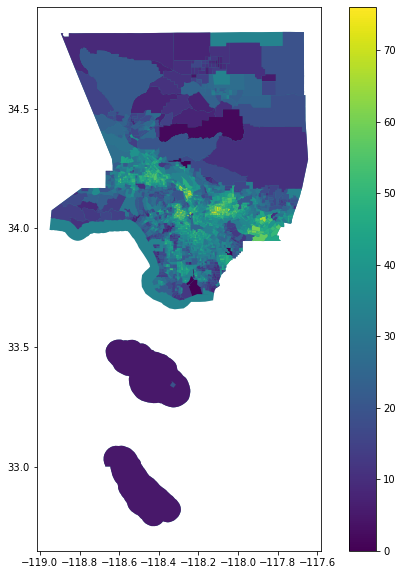

In [68]:
#Looking at our data as a chloropleth for all of LA County

df.plot(figsize=(10,10),
        column='Percent Foreign Born',
        legend=True)

In [85]:
#Isolating our Del Mar Station walkshed census tracts

delmar = df[df["geoid"].isin(['14000US06037461902',  
                                '14000US06037463602', 
                                '14000US06037463700']
)
            ]

In [86]:
delmar.head()

geoid                                   name  \
1362  14000US06037461902  Census Tract 4619.02, Los Angeles, CA   
1384  14000US06037463602  Census Tract 4636.02, Los Angeles, CA   
1385  14000US06037463700     Census Tract 4637, Los Angeles, CA   

      Total Population  Total Foreign Born Population  \
1362            1801.0                          586.0   
1384            6057.0                         1926.0   
1385            3138.0                          602.0   

      China, Hong Kong, and Taiwan  Entered 2010 or later  \
1362                         285.0                  148.0   
1384                         509.0                  144.0   
1385                         191.0                   68.0   

      Entered before 2010  Cuba  Entered 2010 or later  Entered before 2010  \
1362                137.0   0.0                    0.0                  0.0   
1384                365.0   6.0                    0.0                  6.0   
1385                123.0   0.0                    0.0                  0.0   

      ...  Entered 2010 or later  Entered before 2010  Vietnam  \
1362  ...                    0.0                 27.0     11.0   
1384  ...                   30.0                 38.0      0.0   
1385  ...                    0.0                 32.0      0.0   

      Entered 2010 or later  Entered before 2010  All Other Countries  \
1362                    0.0                 11.0                228.0   
1384                    0.0                  0.0                989.0   
1385                    0.0                  0.0                308.0   

      Entered 2010 or later  Entered before 2010  \
1362                  110.0                118.0   
1384                  604.0                385.0   
1385                   58.0                250.0   

                                               geometry  Percent Foreign Born  
1362  MULTIPOLYGON (((-118.15570 34.14973, -118.1554...             32.537479  
1384  MULTIPOLYGON (((-118.15046 34.14577, -118.1497...             31.797920  
1385  MULTIPOLYGON (((-118.16776 34.14147, -118.1676...             19.184194  

[3 rows x 36 columns]

<AxesSubplot:>

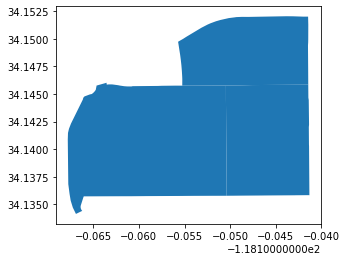

In [87]:
#Quick check to make sure it looks right

delmar.plot()

<AxesSubplot:>

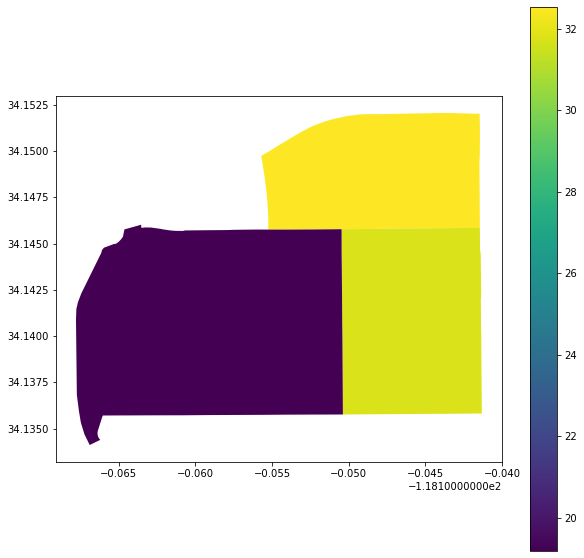

In [88]:
#Fairly narrow range of percentage foreign born here, with a noticeably higher percentage to the north

delmar.plot(figsize=(10,10),
        column='Percent Foreign Born',
        legend=True)

### Bringing it all together

First, let's project our map to web mercator

In [89]:
delmar_web_mercator = delmar.to_crs(epsg=3857)

Lets add a basemap and some details

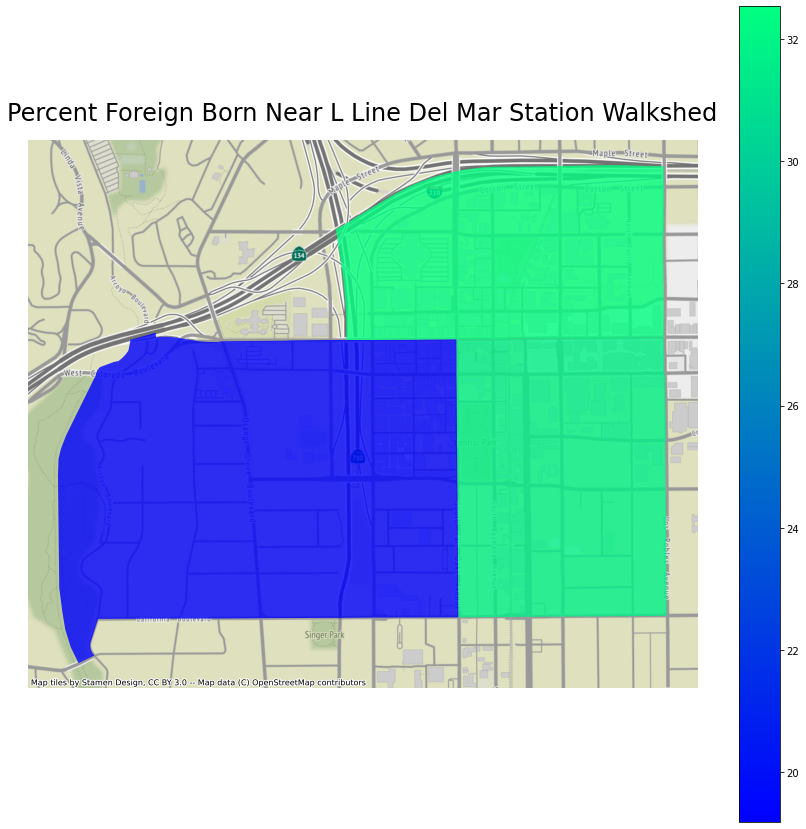

In [90]:
fig, ax = plt.subplots(figsize=(15, 15))
 
delmar_web_mercator.plot(
                    column='Percent Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Del Mar Station Walkshed',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.Stamen.Terrain)
#how can we add a legend and bins to this?

Looking good! Let's layer the isochrone layer on top to show us the walkshed from Del Mar Station

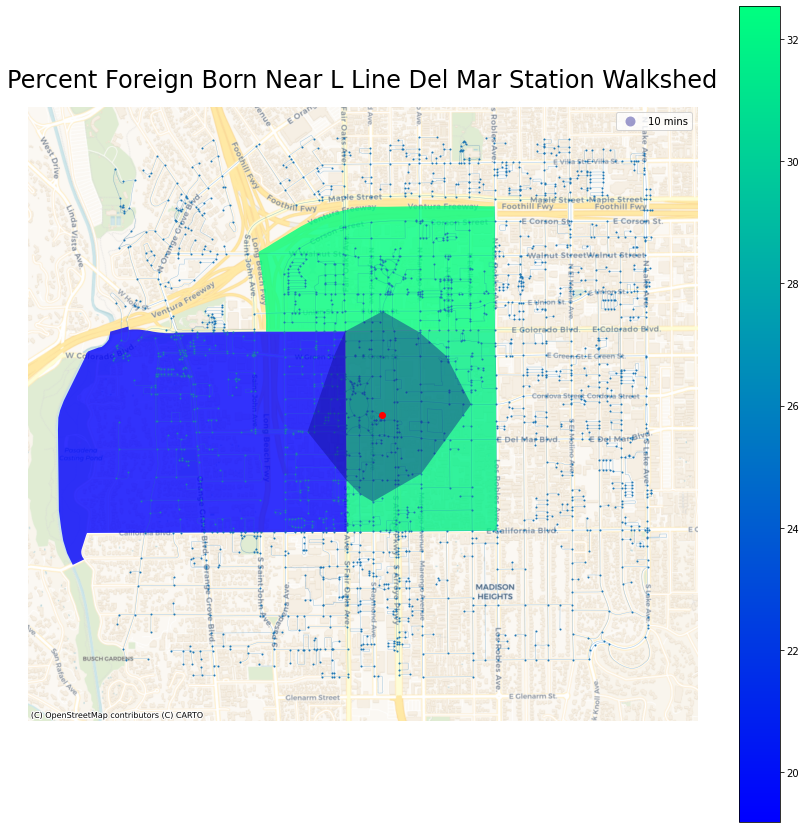

In [91]:
fig, ax = plt.subplots(figsize=(15, 15))
 
delmar_web_mercator.plot(
                    column='Percent Foreign Born',
                    ax=ax, legend=True,
                    alpha=0.8, 
                    cmap="winter")

# add the isochrones
isochrones.plot(alpha=0.4, 
                ax=ax, 
                column='time', 
                cmap='plasma', 
                legend=True,
                zorder=20)

# add the center node in red
gdf_nodes.loc[[center_node]].plot(ax=ax,color='r', zorder=30)

# add all nodes
gdf_nodes.plot(ax=ax, 
               markersize=1, 
               zorder=10)

# add the edges
gdf_edges.plot(ax=ax,
               linewidth=0.5,
               alpha=0.2,
               zorder=10)

ax.axis('off')

ax.set_title('Percent Foreign Born Near L Line Del Mar Station Walkshed',fontsize=24, pad=20)

ctx.add_basemap(ax,source=ctx.providers.CartoDB.Voyager)